# Working with Text Data - Text Preprocessing and Feature Extraction (Text to Numerical Vector)

Text Data

Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:

    1. Spell Checker, Keyword Search, etc
    2.Sentiment Analysis, Spam Classification
    3.Machine Translation
    4.Chatbots/Dialog Systems
    5.Question Answering Systems etc..

However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

# Why NLP is hard?

  1.Complexity of representation
  
  2.Ambiguity in Natural Language

      .Ambiguity means uncertainity of meaning.
      .For Example: The car hit the pole while it was moving.

      .Poems, Sarcasm, etc...
      .Example 1: This task is a piece of cake.
      .Example 2: You have a football game tomorrow. Break a leg!

# Text Preprocessing

  1.Removing special characters and punctuations
  2.Convert sentence into lower case
  3.Tokenisation
  4.Removing stop words
  5.Stemming or Lemmatization

# Feature Extraction Techniques (Convert Text to Numerical Vectors)

   1.Bag of Words
   2.TF IDF (Term Frequency - Inverse Document Frequency)
   3.Word2Vec (by Google)
   4.GloVe (Global Vectors by Stanford) - Not Covered in this notebook
   5.Pretrained GloVe Embeddings
   6.FastText (by Facebook) - Not Covered in this notebook
   7.ELMo (Embeddings from Language Models) - Not Covered in this notebook
   8.BERT (Bidirectional Encoder Representations from Transformer)
   9.GPT
   10.LLM's

# Text Preprocessing Steps
Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

    1.Removing Special Characters and Punctuation - Special characters like ^, ~, @, $, etc... Punctuations like ., ?, ,, etc...

    2.Converting to Lower Case - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

    3.Tokenization (Sentence Tokenization and Word Tokenization) - This is a simple step to break the text into sentences or words.

    4.Removing Stop Words - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

    5.Stemming or Lemmatization - Stemming is the process of removing suffixes and reducing a word to some root form. For eg: warm, warmer, warming can be converted to warm.

In [18]:
pip install nltk

##The full form of "punkt" in this context is "Penn Treebank Tokenizer".It is designed to split text into sentences using an unsupervised learning algorithm trained on various language data. The Punkt tokenizer is commonly used as a pre-processing step in many NLP applications for tasks such as text classification, named entity recognition, and sentiment analysis.

In [19]:
import nltk

In [20]:
# Download the punctuations
nltk.download('punkt')
# Download the stop words corpus
nltk.download('stopwords')
#Downloading wordnet before applying Lemmatize
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

1.PorterStemmer from nltk.stem.porter: This class implements the Porter stemming algorithm, which is a widely-used algorithm for stemming English words. Stemming is the process of reducing words to their base or root form. For example, "running", "runs", and "ran" would all be stemmed to "run". This process can help in tasks such as text normalization and information retrieval.

2.WordNetLemmatizer from nltk.stem: This class implements lemmatization using WordNet, which is a lexical database for the English language. Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma. Unlike stemming, lemmatization considers the context of the word and aims to return a meaningful base form. For example, "running" would be lemmatized to "run", "better" to "good", and "mice" to "mouse". Lemmatization is often preferred over stemming for tasks where the semantic meaning of words is important, such as in natural language understanding and question answering systems.

3.In Python, for example, the "re" module provides support for working with regular expressions. It includes functions like search(), match(), findall(), and sub() for searching, matching, and manipulating strings based on regular expressions.

In [21]:
import re
import nltk
from nltk.tokenize import sent_tokenize ,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
raw_text = "This 1is Natural-LAnguage-Processing. In this example wE are goIng to Learn variouS text9 preprocessing steps."
print(raw_text)

This 1is Natural-LAnguage-Processing. In this example wE are goIng to Learn variouS text9 preprocessing steps.


In [23]:
# Removing special characters and digits
text=re.sub("[^a-zA-Z.]"," ",raw_text)
print(text)

This  is Natural LAnguage Processing. In this example wE are goIng to Learn variouS text  preprocessing steps.


In [24]:
# change sentence to lower case
text=text.lower()
print(text)

this  is natural language processing. in this example we are going to learn various text  preprocessing steps.


In [25]:
# tokenize text into sentences
my_sentence =sent_tokenize(text)
print(my_sentence)

['this  is natural language processing.', 'in this example we are going to learn various text  preprocessing steps.']


In [26]:
# Tokenize sentences to words
for sentence in my_sentence:
    print(word_tokenize(sentence))

['this', 'is', 'natural', 'language', 'processing', '.']
['in', 'this', 'example', 'we', 'are', 'going', 'to', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [27]:
# Tokenize text to words
words=word_tokenize(text)
print(words)

['this', 'is', 'natural', 'language', 'processing', '.', 'in', 'this', 'example', 'we', 'are', 'going', 'to', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [28]:
# Removing stop words
words=[word for word in words if word not in stopwords.words('english')]
print(words)

['natural', 'language', 'processing', '.', 'example', 'going', 'learn', 'various', 'text', 'preprocessing', 'steps', '.']


In [29]:
# Stemming

## initialise the inbuilt Stemmer
stemmer=PorterStemmer()
clean_tokens_stem=[stemmer.stem(word) for word in words]
print(clean_tokens_stem)

['natur', 'languag', 'process', '.', 'exampl', 'go', 'learn', 'variou', 'text', 'preprocess', 'step', '.']


In [30]:
# Lemmatizing

#We can also use Lemmatizer instead of Stemmer
lemmatizer=WordNetLemmatizer()
clean_tokens_lem=[lemmatizer.lemmatize(word) for word in words]
print(clean_tokens_lem)

['natural', 'language', 'processing', '.', 'example', 'going', 'learn', 'various', 'text', 'preprocessing', 'step', '.']


# Lets put it all together

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
lst_text = ['it Was the best oF Times $',
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom',
            'it was thE age of foolishness']


In [33]:
df=pd.DataFrame({'text':lst_text})

In [34]:
df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [35]:
def preprocess(raw_text,flag):
     # Removing special characters and digits
     text=re.sub("[^a-zA-Z]"," ",raw_text)
     # change text to lower case
     text=text.lower()
     # tokenize into words
     words=word_tokenize(text)
    # remove stop words
     words =[word for word in words if word not in stopwords.words("english")]
    # Stemming/Lemmatization
     if (flag =='stem'):
         words=[stemmer.stem(word) for word in words]
     else:
         words=[lemmatizer.lemmatize(word) for word in words]
     preprocessed_text=" ".join(words)
     word_in_preprocessed_text=len(words)
     return pd.Series([preprocessed_text,word_in_preprocessed_text])

In [36]:
temp_df=df['text'].apply(lambda x:preprocess(x,'stem'))
temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [37]:
temp_df.columns=["clean_text_stem","text_length_stem"]
temp_df.head()

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [38]:
df=pd.concat([df,temp_df],axis=1)
df.head()

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of foolishness,age foolish,2


In [39]:
temp_df=df['text'].apply(lambda x:preprocess(x,'leema'))
temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [40]:
temp_df.columns=['clean_text_leema','text_length_leema']
temp_df.head()

,clean_text_leema,text_length_leema
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [41]:
df=pd.concat([df,temp_df],axis=1)
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


# Bag of Word Representation

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to convert text into a matrix of token count.

Bag of Words: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Code Example: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

We are going to perform below mentioned steps to understand the entire process:
a. Converting text to numerical vectors with the help of CountVectorizer
b. Understand fit and transform
c. Looking at vocabulary_
d. Converting sparse matrix to dense matrix using toarray()
e. Understanding n_gram

Advantages

1. It is simple to understand and implement like OneHotEncoding.
2. We have a fixed length encoding for any sequence of arbitrary length.
3. Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.

Disadvantages

1.The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.

2.It does not capture the similarity between different words that mean the same thing. i.e. Semantic Meaning is not captured.

     a. "walk", "walked", and "walking". BoW vectors of all three tokens will be equally apart.
     b. "search" and "explore" are synonyms. BoW won't capture the semantic similarity of these words.

3.This representation does not have any way to handle out of vocabulary (OOV) words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).

4.As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it is by using n-grams.

5.It suffers from curse of high dimensionality.

In [42]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


In [43]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab=CountVectorizer()
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
dtm=vocab.fit_transform(df['clean_text_leema'])

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)

In [44]:
# We can look at unique words by using 'vocabulary_'
vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [45]:
# Observe that the type of dtm is sparse
print(type(dtm))


<class 'scipy.sparse._csr.csr_matrix'>


In [46]:
# Lets now print the  shape of this dtm
print(dtm.shape)
# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [47]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word.
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document.
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [48]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [49]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [50]:
pd.DataFrame(dtm.toarray(),columns=sorted(vocab.vocabulary_))


,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [51]:
# 2-grams
vocab=CountVectorizer(ngram_range=(1,2))
dtm=vocab.fit_transform(df.clean_text_stem)

In [52]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [53]:
# convert sparse matrix to numpy array
print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [54]:
pd.DataFrame(dtm.toarray(),columns=sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


# Observations:

   .vect.fit(lst_text) learns the vocabulary
   .vect.transform(lst_text) uses the fitted vocabulary to build a document-term matrix

# Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

Let's now try to understand:

  1.Term Frequency
  
  2.Inverse Document Frequency
  
                                  TF IDF = TF(wordi, docj,) * IDF(wordi, corpus)

                                  TF(wordi, docj) = (No of time wordi, occurs in docj )/(Total no of words in docj)

                                  IDF(wordi, corpus) = log( (No of docs in corpus) /(No of docs which contains wordi))

# Advantages

   .If the word is rare in the corpus, it will be given more importance. (i.e. IDF)
   
   .If the word is more frequent in a document, it will be given more importance. (i.e. TF)

# Disadvantages

   .Same as BOW

In [55]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vocab=TfidfVectorizer()

dtm=vocab.fit_transform(df['clean_text_leema'])

In [56]:
print(vocab.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [57]:
print(dtm.toarray())
#convert sparse matrix to nparray

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [58]:
pd.DataFrame(dtm.toarray(),columns=sorted(vocab.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


# Latent Space

A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

# Word Embeddings (Word Vectors)

In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

Traditionally, one of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonymy are not handled properly.

# Word2Vec

"You shall know the word by the company it keeps." by JR Firth

Distributional Semantics (i.e. a word is characterized by the company it keeps)
W2v works well because there is an idea of meaning distribution in the context.

Algorithms to generate Word2Vec Embeddings

    . SkipGram
    . Continuous Bag of Words
Issue
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is,

      Is it possible to segregate the three vectors to represent the words based in the context?
      Is it possible to disambiguate the word vectors based on the context?

Word2Vec is not capturing the contextual information. This is where BERT comes handy.

In [59]:
! pip install --upgrade gensim

In [60]:
import gensim

print(gensim.__version__)

4.3.2


In [61]:
from gensim.models import Word2Vec

In [62]:
df['tokenize_sentences']=df.clean_text_stem.apply(lambda sent:sent.split())
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


In [63]:
list(df.tokenize_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [64]:
# train model
model=Word2Vec(list(df.tokenize_sentences),vector_size=100,min_count=1)

In [65]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [66]:
# Total Documents
model.corpus_count

4

In [67]:
# Looking at the vocabulary
print(model.wv.key_to_index)
print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [68]:
# access the 100 dimensional vector for one of the words
print(model.wv.__getitem__('foolish'))
print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-03  9.43379

In [69]:
# Access the 100D vectors for all 6 words
print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
  -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
  -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
  -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
   8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
  -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
   4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
  -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
   4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
  -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [70]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


In [71]:
# save model
# model.save('model/first_word_vectors.bin')

# # load model
# new_model = Word2Vec.load('model/first_word_vectors.bin')
# print(new_model)
#PCA stands for Principal Component Analysis. It is a statistical technique used for dimensionality reduction in data analysis and machine learning.
#The main goal of PCA is to transform a dataset with possibly correlated variables into a new set of variables,
# called principal components, which are linearly uncorrelated and capture the maximum variance in the data.

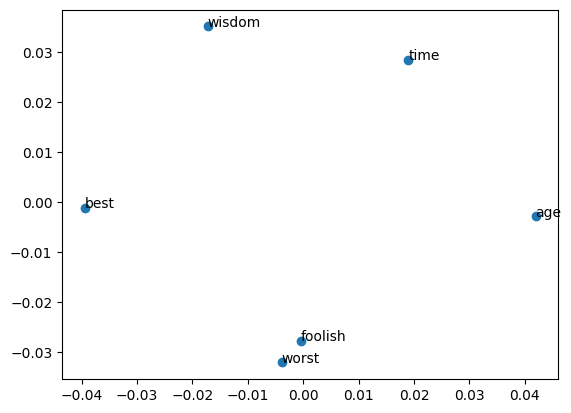

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X=model.wv.__getitem__(model.wv.index_to_key)
pca=PCA(n_components=2)
result=pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:,0],result[:,1])
words=list(model.wv.index_to_key)
for i, word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [73]:
model.wv.similarity('best','worst')

0.13887982

In [74]:
model.wv.most_similar('foolish')

[('worst', 0.17018885910511017),
 ('best', 0.06408978998661041),
 ('wisdom', -0.013514922931790352),
 ('time', -0.023671654984354973),
 ('age', -0.05234673619270325)]

In [75]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


# Sentence Embedding (Document Vectors)

In [76]:
# Remove out-of-vocabulary words
sentence = ['best', 'bansal', 'time', 'kanav']
vocab_tokens=[word for word in sentence if word  in model.wv.index_to_key]
print(vocab_tokens)

['best', 'time']


In [77]:
# Create document vectors by averaging word vectors
np.mean(model.wv.__getitem__(vocab_tokens),axis=0)

array([-8.6735850e-03,  2.8979499e-03,  2.1581696e-03, -1.7885750e-03,
       -9.8061212e-04, -3.7891967e-03,  2.7690111e-03,  4.8756767e-03,
       -4.6693720e-03, -6.5232953e-03, -2.7048176e-03, -5.3278962e-03,
       -6.4251497e-03, -1.2493895e-03,  3.0445517e-04, -5.6858570e-04,
        3.8068579e-04,  9.2990650e-04, -3.0666459e-03, -1.1344015e-03,
       -3.3043111e-03, -2.6271159e-03,  8.2706194e-03, -1.0838672e-03,
       -2.2073742e-04, -3.7620717e-04, -9.0713974e-04, -2.5862674e-03,
       -1.3156777e-04,  6.6179251e-03,  7.8556351e-03, -6.5627526e-03,
       -2.5582409e-03, -6.9178990e-03,  1.9483893e-03,  6.0251304e-03,
        6.4321910e-03,  5.5842018e-03,  7.2997799e-03,  3.0152500e-03,
        8.7251253e-03, -7.1729645e-03, -8.2131261e-03, -1.3105709e-03,
       -1.9392008e-03,  2.3391065e-03,  2.6729943e-03,  2.9715800e-03,
        4.0672242e-04,  8.2550046e-05,  5.2809850e-03, -8.9346431e-03,
        3.8251362e-03,  6.0026506e-03, -5.2615297e-03,  5.4140193e-03,
      

In [78]:
np.mean(model.wv.__getitem__(vocab_tokens),axis=0).shape

(100,)

In [79]:
def document_vector(doc,keyed_vector):
  """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
  vocab_token=[word for word in doc if word in keyed_vector.index_to_key]
  return np.mean(keyed_vector.__getitem__(vocab_token),axis=0)

In [80]:
df['doc_vec_to_w2v']=df.tokenize_sentences.apply(lambda x:document_vector(x,model.wv))

In [81]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences,doc_vec_to_w2v
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0...."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ..."


In [82]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.3.2
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [83]:
wv=api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [84]:
# Approax 200MB Size
# Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

In [85]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [86]:
# Vocabulary Size and Word Embedding Shape
print(wv.index_to_key)
print(wv.__getitem__('school').shape)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [87]:
wv.most_similar('developer',topn=5)

[('sharepoint', 0.8866323828697205),
 ('administrator', 0.8673086166381836),
 ('programmer', 0.8619340658187866),
 ('architect', 0.8591458201408386),
 ('oracle', 0.8557209372520447)]

In [88]:
wv.similarity('developer','development')

0.7817412

In [89]:
wv.__getitem__('college')

array([ 1.7885  , -0.067292,  0.46616 , -0.81783 ,  0.10752 ,  0.30621 ,
        1.4632  , -0.12453 , -0.10154 , -0.23087 , -0.572   ,  0.086826,
       -4.051   ,  0.85883 ,  0.71311 , -0.049015, -0.51012 ,  0.22284 ,
       -0.98466 ,  0.78809 ,  0.53688 ,  0.17593 ,  0.26659 , -0.86271 ,
        0.051508,  0.29894 ,  0.74473 , -0.85046 , -0.32939 , -0.31356 ,
        0.63817 , -1.1198  , -0.1482  , -0.46216 ,  0.046157, -0.46282 ,
       -0.32383 ,  1.5272  ,  0.76098 , -0.1311  , -0.35028 ,  0.51516 ,
       -0.07257 ,  0.2536  ,  0.5363  , -0.46969 ,  0.3285  ,  0.17779 ,
       -0.47109 ,  0.37841 ], dtype=float32)

# Semantic regularities captured in word embeddings

In [90]:
wv.similarity('college','school')

0.8894184

In [91]:
wv.similarity('college','university')

0.81164277

In [92]:
wv.similarity('college','apple')

0.39391714

In [93]:
wv.most_similar('college',topn=5)

[('school', 0.8894184231758118),
 ('student', 0.8599385023117065),
 ('class', 0.8441339731216431),
 ('classes', 0.8319132924079895),
 ('basketball', 0.8274194002151489)]

In [94]:
wv.most_similar('mango',topn=5)

[('yogurt', 0.8689919710159302),
 ('coconut', 0.8518491387367249),
 ('strawberry', 0.8414680361747742),
 ('fanta', 0.8399896621704102),
 ('mocha', 0.8393071293830872)]

In [95]:
wv.most_similar(positive=['college','university'],topn=5)

[('student', 0.8731303811073303),
 ('students', 0.8377566337585449),
 ('schools', 0.8342148065567017),
 ('campus', 0.8218968510627747),
 ('cambridge', 0.8131343126296997)]

In [96]:
wv.most_similar(positive=['student','class'],negative=['college'],topn=5)

[('teacher', 0.8359395265579224),
 ('form', 0.8157237768173218),
 ('study', 0.8039187788963318),
 ('lecturer', 0.7983314394950867),
 ('exam', 0.7941811084747314)]

In [97]:
print(wv.doesnt_match(['college', 'university', 'school', 'student', 'apple']))

apple


In [98]:
words = ['college', 'mango', 'school','student','class', 'strawberry', 'coconut']

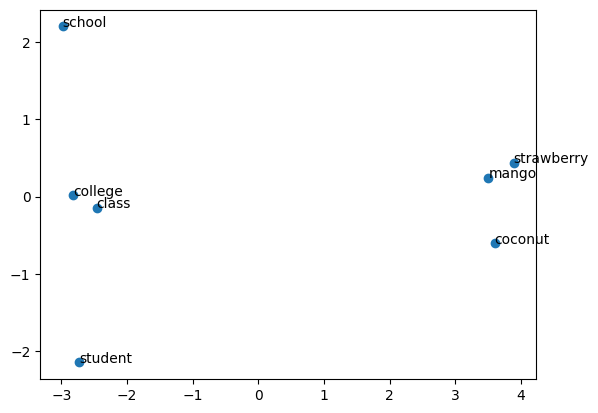

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X=np.array([wv[word] for word in words])
pca=PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()


# Sentence Embedding from Pretrained Model (Document Vectors)

In [100]:
def document_vector_pretrained(doc,keyed_vector):
   """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
   vocab_token=[word for word in doc if word in keyed_vector.index_to_key]
   return np.mean(keyed_vector.__getitem__(vocab_token),axis=0)

In [101]:
df['doc_vector_pretrained_glove']=df.tokenize_sentences.apply(lambda x:document_vector_pretrained(x,wv))
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences,doc_vec_to_w2v,doc_vector_pretrained_glove
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,..."


# Word2Vec vs BERT

**Embeddings**

Word2Vec offers pre-trained word embeddings that anyone can use off-the-shelf. The embeddings are key: value pairs, essentially 1-1 mappings between words and their respective vectors. Word2Vec takes a single word as input and outputs a single vector representation of that word.

Since BERT generates contextual embeddings, it takes as input a sequence (usually a sentence) rather than a single word. BERT needs to be shown the context that surrounding words provide before it can generate a word embedding. With BERT, you do need to have the actual model as the vector representations of words will vary based on the specific sequences you’re inputting. The output is a fixed-length vector representation of the input sentence.

BERT or Bidirectional Encoder Representations from Transformers, is a technique that allows for bidirectional training of Transformers for natural language modeling tasks. Language models which are bidirectionally trained can learn deeper context from language than single-direction models. BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word’s context.

**Word Ordering**

Word2Vec embeddings do not take into account the word position.

BERT model explicitly takes as input the position (index) of each word in the sentence before calculating its embedding.

**Out-of-Vocabulary**

Since Word2Vec learns embeddings at word level, it can only generate embeddings for words that existed in it’s training set (aka it’s “vocabulary space”). This is a major drawback to Word2Vec - that it just doesn’t support Out-of-Vocabulary words.

Alternatively, BERT learns representations at the subword level, so a BERT model will have a smaller vocabulary space than the number of unique words in its training corpus. In turn, BERT is able to generate embeddings for words outside of its vocabulary space giving it a near infinite vocabulary.

Sentence BERT (SBERT)
! pip install -U sentence-transformers

Sentence BERT References:
https://www.sbert.net/index.html
https://www.sbert.net/docs/pretrained_models.html

Find the paper for Sentence BERT here: https://arxiv.org/pdf/1908.10084.pdf

BERT (Devlin et al., 2018) and RoBERTa (Liu et al., 2019) has set a new state-of-the-art performance on sentence-pair regression tasks like semantic textual similarity (STS). However, it requires that both sentences are fed into the network, which causes a massive computational overhead: Finding the most similar pair in a collection of 10,000 sentences requires about 50 million inference computations (~65 hours) with BERT. The construction of BERT makes it unsuitable for semantic similarity search as well as for unsupervised tasks like clustering.

Sentence-BERT (SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT bold text *italicized text*.

**Usage**

  .Computing Sentence Embeddings

  .Semantic Textual Similarity

  .Semantic Search

  .Retrieve and Re-Rank

  .Clustering

  .Paraphrase Mining

  .Translated Sentence Mining

  .Cross Encoders
  
  .Image Search

In [102]:
! pip install -U sentence-transformers

In [103]:
from sentence_transformers import SentenceTransformer,util

In [104]:
model=SentenceTransformer('all-MiniLM-L6-v2')

# Model Overview

      from sentence_transformers import SentenceTransformer
      model = SentenceTransformer('model_name')

All models are hosted on the HuggingFace Model Hub.


The following table provides an overview of (selected) models. They have been extensively evaluated for their quality to embedded sentences (Performance Sentence Embeddings) and to embedded search queries & paragraphs (Performance Semantic Search).


The all-* models **bold text**  models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The **all-mpnet-base-v2** model provides the best quality, while **all-MiniLM-L6-v2 is 5 times faster** and still offers good quality. Toggle All models to see all evaluated models or visit [*HuggingFace Model*](https://) Hub to view all existing sentence-transformers models.

**Model Name**

**all-mpnet-base-v2**

       Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
       Dimensions: 768
      Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
      Size: 420 MB
      Training Data: 1B+ training pairs. For details, see model card.
      Model Card: https://huggingface.co/sentence-transformers/all-mpnet-base-v2

**multi-qa-mpnet-base-dot-v1**

      Description: This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
      Dimensions: 768
      Suitable Score Functions: dot-product (util.dot_score)
      Size: 420 MB
      Training Data: 215M (question, answer) pairs from diverse sources.
      Model Card: https://huggingface.co/sentence-transformers/multi-qa-mpnet-base-dot-v1

**all-distilroberta-v1**

      Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
      Dimensions: 768
      Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
      Size: 290 MB
      Training Data: 1B+ training pairs. For details, see model card.
      Model Card: https://huggingface.co/sentence-transformers/all-distilroberta-v1

**all-MiniLM-L6-v2**

     Description: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
     Dimensions: 384
     Suitable Score Functions: dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
     Size: 80 MB
     Training Data: 1B+ training pairs. For details, see model card
     Model Card: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

**List of Pretrained models available:**

     all-MiniLM-L12-v2
     multi-qa-distilbert-cos-v1
     multi-qa-MiniLM-L6-cos-v1
     multi-qa-MiniLM-L6-cos-v1
     paraphrase-multilingual-mpnet-base-v2
     paraphrase-albert-small-v2
     paraphrase-multilingual-MiniLM-L12-v2
     paraphrase-MiniLM-L3-v2
     distiluse-base-multilingual-cased-v1
     distiluse-base-multilingual-cased-v2

In [105]:
# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling model.encode()
embeddings= model.encode(sentences)
# Print the embeddings
for sentence,embedding  in zip(sentences,embeddings):
  print('Sentence:',sentence)
  print('Embedding:',embedding)
  print('')

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173636e-02 -4.28515300e-02 -1.56285763e-02  1.40537256e-02
  3.95538062e-02  1.21796295e-01  2.94334255e-02 -3.17524262e-02
  3.54959220e-02 -7.93139935e-02  1.75878536e-02 -4.04370055e-02
  4.97259423e-02  2.54912376e-02 -7.18700588e-02  8.14969018e-02
  1.47071446e-03  4.79627214e-02 -4.50336300e-02 -9.92174745e-02
 -2.81769466e-02  6.45046532e-02  4.44670431e-02 -4.76217307e-02
 -3.52952555e-02  4.38671559e-02 -5.28565943e-02  4.33028239e-04
  1.01921469e-01  1.64072178e-02  3.26996669e-02 -3.45986858e-02
  1.21339308e-02  7.94870928e-02  4.58348216e-03  1.57778300e-02
 -9.68206767e-03  2.87625846e-02 -5.05806245e-02 -1.55793559e-02
 -2.87906751e-02 -9.62282345e-03  3.15556787e-02  2.27348916e-02
  8.71449411e-02 -3.85027900e-02 -8.84718299e-02 -8.75499286e-03
 -2.12343223e-02  2.08923426e-02 -9.02077556e-02 -5.25732413e-02
 -1.05639156e-02  2.88310628e-02 -1.61454752e-02  6.17834646e-03
 -1.23234

In [106]:
emb1=model.encode('I am eating Mango')
emb2=model.encode('I Like Fruits')
emb3=model.encode("I work at Microsoft")
cos_sim_12=util.cos_sim(emb1,emb2)
cos_sim_13=util.cos_sim(emb1,emb3)
print("cosine-similarity between 1 and 2:",cos_sim_12)
print('cosine-similarity between 1 and 3:',cos_sim_13)

cosine-similarity between 1 and 2: tensor([[0.4914]])
cosine-similarity between 1 and 3: tensor([[0.1904]])


In [107]:
sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

embedings=model.encode(sentences)

#Compute cosine similarity between all pairs

cos_sim=util.cos_sim(embeddings,embeddings)

cos_sim

tensor([[1.0000, 0.5381, 0.1181],
        [0.5381, 1.0000, 0.1036],
        [0.1181, 0.1036, 1.0000]])

In [108]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences,doc_vec_to_w2v,doc_vector_pretrained_glove
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,..."


In [109]:
df['doc_vector_pretrained_BERT']=df.clean_text_leema.apply(model.encode)
df.head()

,text,clean_text_stem,text_length_stem,clean_text_leema,text_length_leema,tokenize_sentences,doc_vec_to_w2v,doc_vector_pretrained_glove,doc_vector_pretrained_BERT
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431...","[-0.092428125, 0.03253753, -0.018796453, -0.03..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0...","[-0.07362394, 0.075362206, 0.005589677, 0.0316..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70...","[0.02470789, 0.14167035, 0.012471489, 0.063883..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,...","[0.054718718, 0.13996214, 0.058517694, -0.0033..."
